<div style="background-color:#fad0c4; color:#355c7d; text-align:center; padding:15px; border-radius:15px; font-size:25px; ">Insurance Prediction Analysis</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option("display.max_columns",None)
warnings.filterwarnings("ignore")
train_df = pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [2]:
print(f"Shape Of the Train Data : {train_df.shape}")
print(f"Shape Of the Test Data : {test_df.shape}")


Shape Of the Train Data : (1200000, 21)
Shape Of the Test Data : (800000, 20)


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [5]:
categorical_columns  = train_df.select_dtypes(include = "object").columns
for col in categorical_columns:
    print(f"No of Unique Values in {col} : {train_df[col].nunique()}")

No of Unique Values in Gender : 2
No of Unique Values in Marital Status : 3
No of Unique Values in Education Level : 4
No of Unique Values in Occupation : 3
No of Unique Values in Location : 3
No of Unique Values in Policy Type : 3
No of Unique Values in Policy Start Date : 167381
No of Unique Values in Customer Feedback : 3
No of Unique Values in Smoking Status : 2
No of Unique Values in Exercise Frequency : 4
No of Unique Values in Property Type : 3


In [6]:
for col in categorical_columns:
    print(f"No of Unique Values in {col} : {test_df[col].nunique()}")
    print(f"No of Null Values in {col} : {test_df[col].isnull().sum()}")

No of Unique Values in Gender : 2
No of Null Values in Gender : 0
No of Unique Values in Marital Status : 3
No of Null Values in Marital Status : 12336
No of Unique Values in Education Level : 4
No of Null Values in Education Level : 0
No of Unique Values in Occupation : 3
No of Null Values in Occupation : 239125
No of Unique Values in Location : 3
No of Null Values in Location : 0
No of Unique Values in Policy Type : 3
No of Null Values in Policy Type : 0
No of Unique Values in Policy Start Date : 158776
No of Null Values in Policy Start Date : 0
No of Unique Values in Customer Feedback : 3
No of Null Values in Customer Feedback : 52276
No of Unique Values in Smoking Status : 2
No of Null Values in Smoking Status : 0
No of Unique Values in Exercise Frequency : 4
No of Null Values in Exercise Frequency : 0
No of Unique Values in Property Type : 3
No of Null Values in Property Type : 0


In [7]:
print("NUll values in Train Data : ")
print(train_df.isnull().sum())
print("*"*100)
print("NUll values in Test Data : ")
print(test_df.isnull().sum())

NUll values in Train Data : 
id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64
****************************************************************************************************
NUll values in Test Data : 
id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents   

In [8]:
numeric_columns =['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']

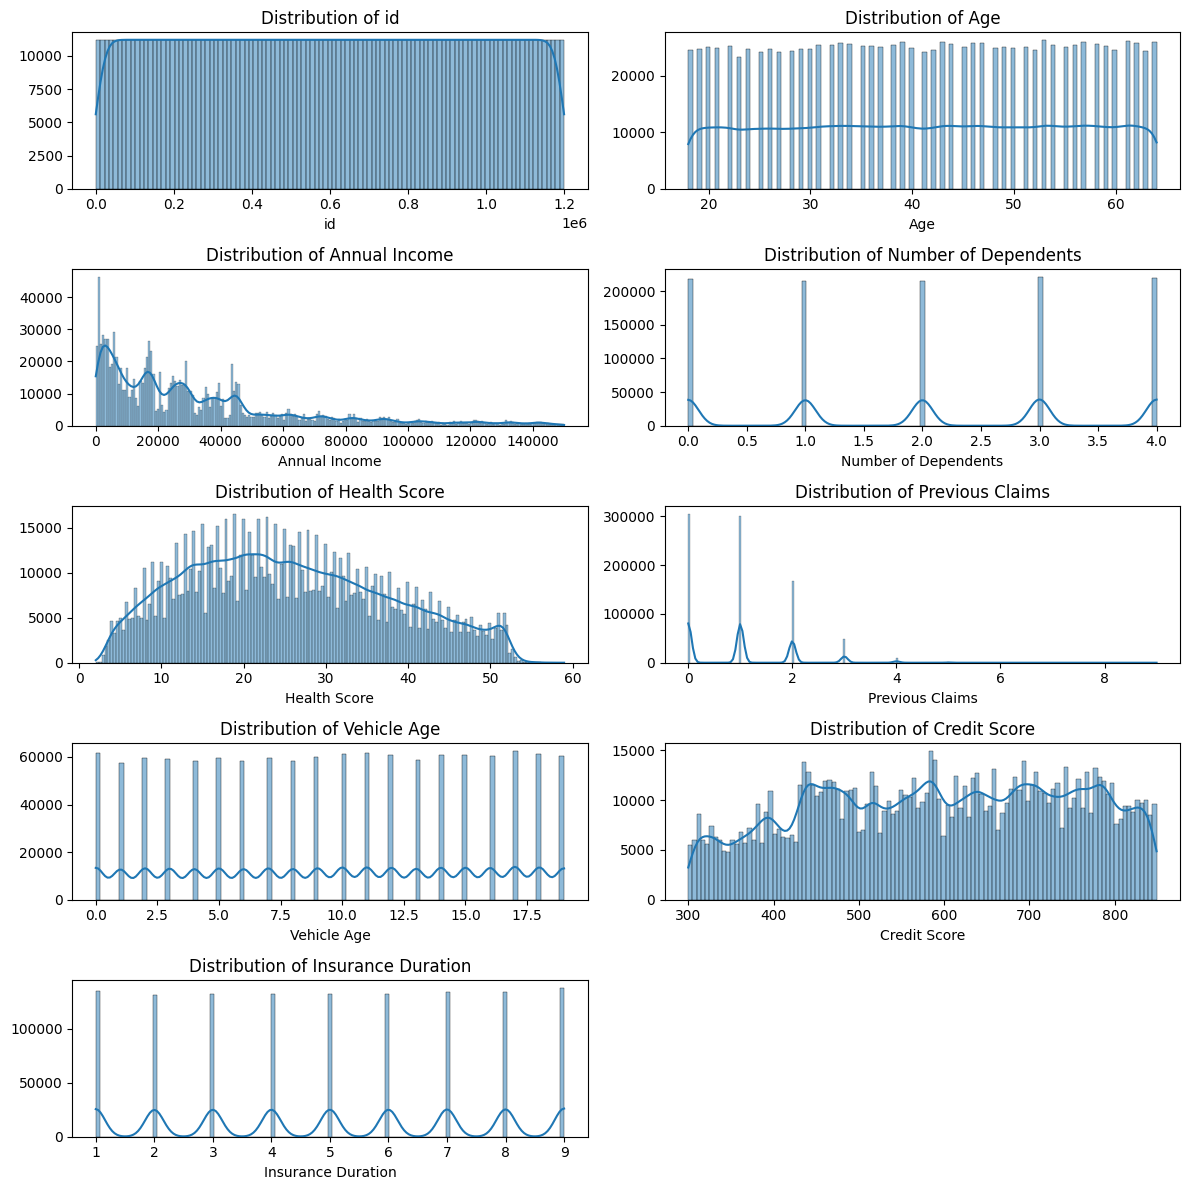

In [9]:
plt.figure(figsize=(12,12))

i = 0
def hist_plot(col):
    global i 
    i+=1
    plt.subplot(5,2,i)
    sns.histplot(x=train_df[col],kde=True)
    plt.xlabel(col)
    plt.ylabel("")
    plt.title(f"Distribution of {col}")

for col in numeric_columns:
    hist_plot(col)
plt.tight_layout()


plt.show()



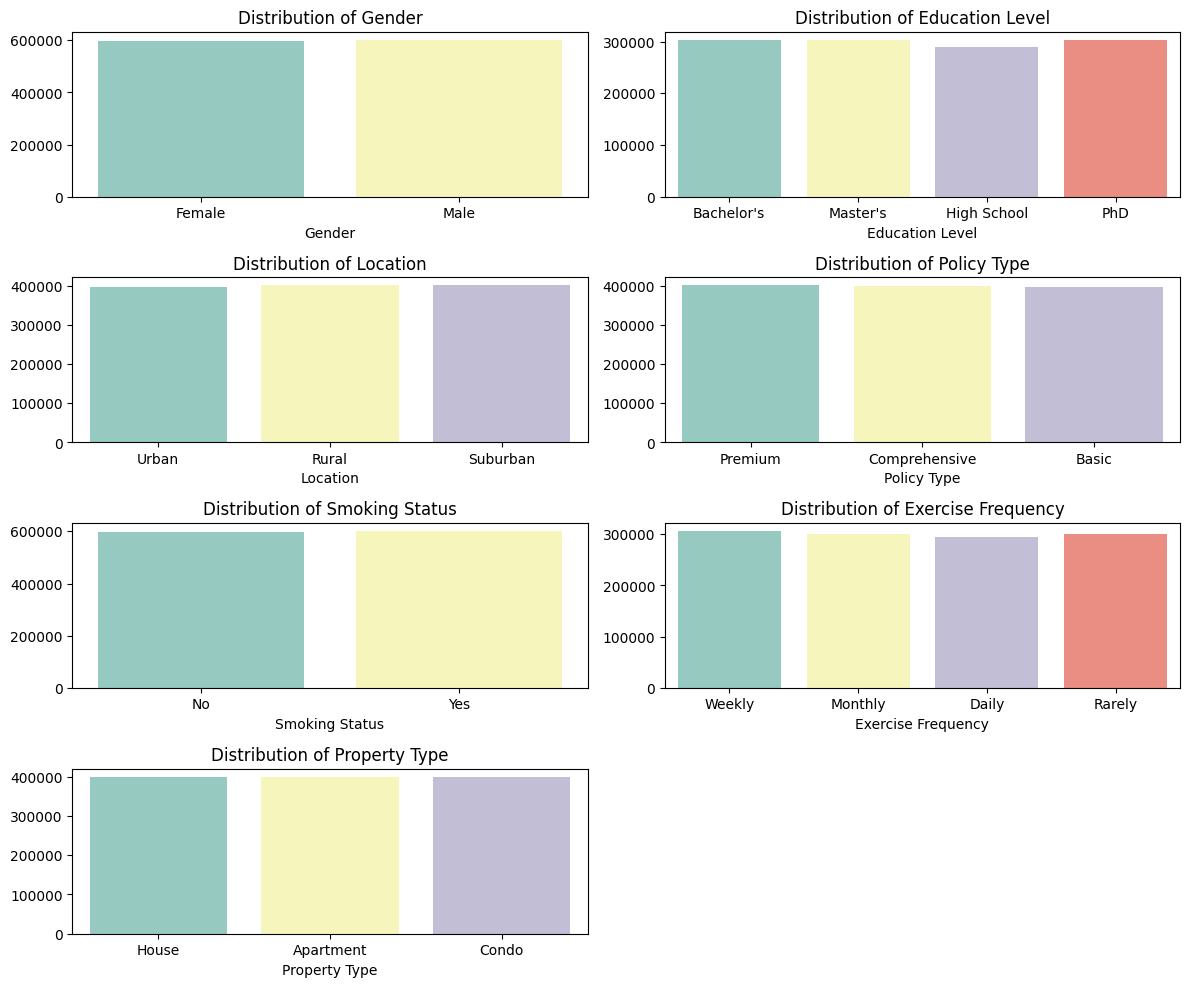

In [10]:
plt.figure(figsize=(12,12))

i = 0
def count_plot(col):
    global i 
    i+=1
    plt.subplot(5,2,i)
    sns.countplot(x=train_df[col],palette="Set3")
    plt.xlabel(col)
    plt.ylabel("")
    plt.title(f"Distribution of {col}")

for col in ['Gender','Education Level','Location','Policy Type','Smoking Status','Exercise Frequency','Property Type']:
    count_plot(col)
plt.tight_layout()

plt.show()

In [11]:
categorical_columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

train_df[numeric_columns] = imputer.fit_transform(train_df[numeric_columns])
test_df[numeric_columns] = imputer.fit_transform(test_df[numeric_columns])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[categorical_columns] = imputer.fit_transform(train_df[categorical_columns])
test_df[categorical_columns] = imputer.transform(test_df[categorical_columns])
 

In [13]:
train_df.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64